In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

In [41]:
# Load the dataset
df = pd.read_csv("DMart.csv")
df = df.dropna(subset=['DiscountedPrice'])

In [42]:
df = df[df['DiscountedPrice'] > 0]


In [43]:
# Define fixed cost
fixed_costs = 100000

In [44]:
# Calculate variable cost (60% of discounted price)
df['VariableCost'] = df['DiscountedPrice'] * 0.60

In [45]:
# Simulate units sold (100 to 1000)
np.random.seed(42)
df['UnitsSold'] = np.random.randint(500, 5000, size=len(df))


In [46]:
# Calculate Contribution Margin, Total Contribution, Profit, Break-Even Units
df['ContributionMargin'] = df['DiscountedPrice'] - df['VariableCost']
df['TotalContribution'] = df['ContributionMargin'] * df['UnitsSold']
df['Profit'] = df['TotalContribution'] - fixed_costs
df['BreakEvenUnits'] = fixed_costs / df['ContributionMargin']

In [47]:

# Combine rows with the same product name by grouping
df_grouped = df.groupby('Name').agg({
    'Brand': 'first',  # Take the first brand name (assuming same brand for same product)
    'DiscountedPrice': 'mean',  # Average discounted price
    'VariableCost': 'mean',  # Average variable cost
    'UnitsSold': 'sum',  # Sum of units sold
    'ContributionMargin': 'mean',  # Average contribution margin
    'TotalContribution': 'sum',  # Sum of total contribution
    'Profit': 'sum',  # Sum of profit
    'BreakEvenUnits': 'mean'  # Average break-even units
}).reset_index()

In [48]:
# Filter for products with a contribution margin <= 0
print(df_grouped[df_grouped['ContributionMargin'] <= 0][['Name', 'DiscountedPrice', 'VariableCost']])


Empty DataFrame
Columns: [Name, DiscountedPrice, VariableCost]
Index: []


In [49]:
# Save CVP Analysis to CSV
df_cvp = df_grouped[['Name', 'Brand', 'DiscountedPrice', 'VariableCost', 'UnitsSold',
             'ContributionMargin', 'TotalContribution', 'Profit', 'BreakEvenUnits']]
df_cvp.to_csv("DMart_CVP_Analysis_1.csv", index=False)

In [51]:
sns.set(style="whitegrid")

/var/folders/jv/_gs50w5x6zq747kbpznwtf_c0000gn/T/ipykernel_57477/1489432646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_profit, x='Name', y='BreakEvenUnits', palette="viridis")


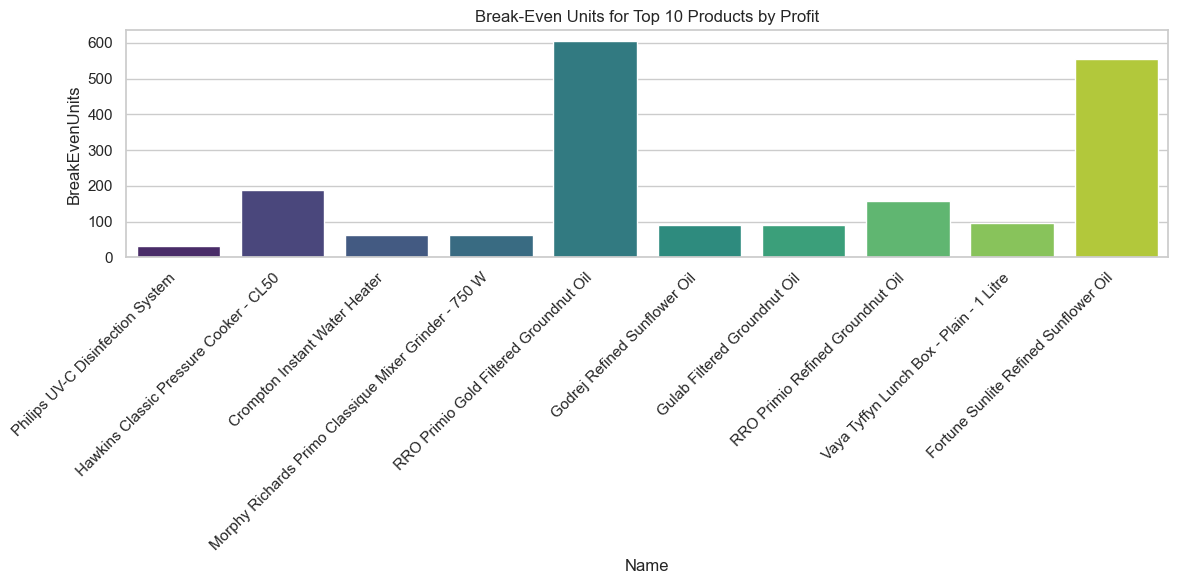

In [67]:
# Break-even chart
top10_profit = df_cvp.sort_values(by="Profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_profit, x='Name', y='BreakEvenUnits', palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Break-Even Units for Top 10 Products by Profit')
plt.tight_layout()
plt.show()  
plt.close()


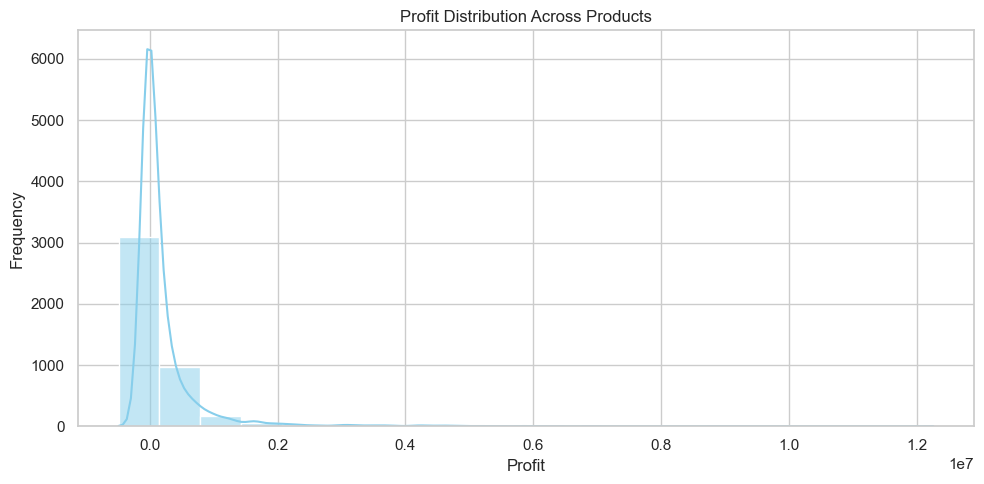

In [53]:
# Profit distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cvp['Profit'], bins=20, kde=True, color='skyblue')
plt.title('Profit Distribution Across Products')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("profit_distribution.png")
plt.show()   
plt.close()

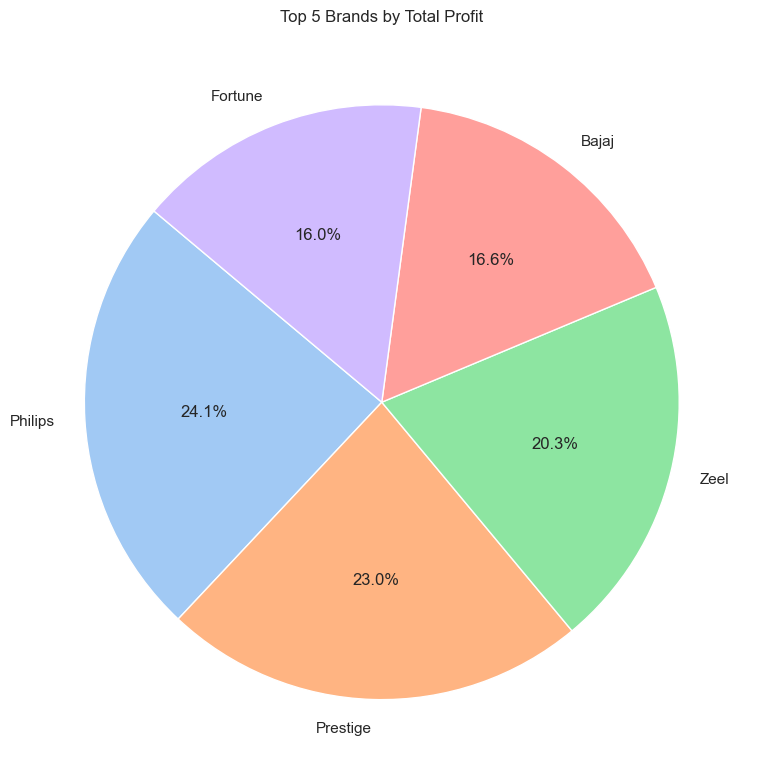

In [54]:
top5_brands = df_cvp.groupby('Brand')['Profit'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
top5_brands.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Brands by Total Profit')
plt.ylabel('')
plt.tight_layout()
plt.savefig("top5_brands_pie.png")
plt.show()
plt.close()
pdf.ln(10)
pdf.cell(200, 10, txt="Top 5 Most Profitable Products", ln=True)

# Add a simple table (you can customize width later)
top5_products = df_cvp.sort_values(by='Profit', ascending=False).head(5)
for i, row in top5_products.iterrows():
    pdf.cell(0, 10, txt=f"{row['Name']} | ₹{row['Profit']:.2f}", ln=True)


/var/folders/jv/_gs50w5x6zq747kbpznwtf_c0000gn/T/ipykernel_57477/2280031330.py:37: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.savefig("break_even_chart.png")


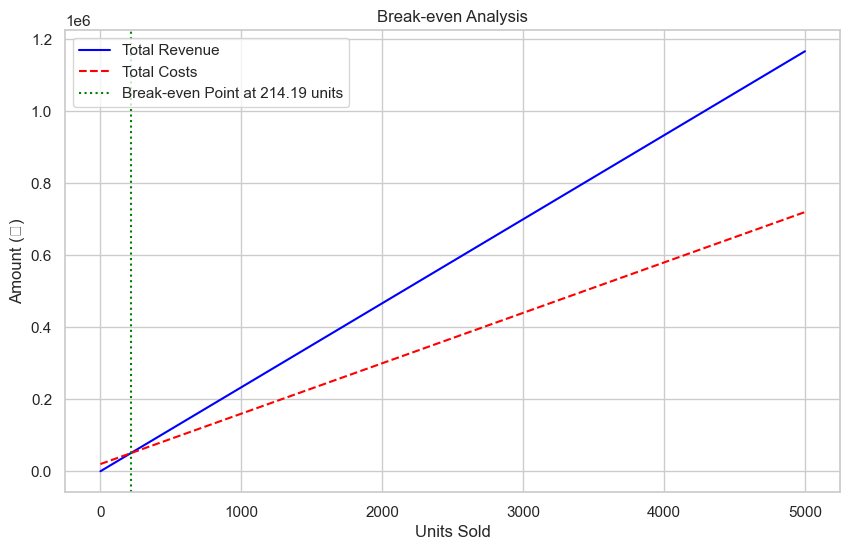

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Define the fixed costs (can be customized)
fixed_costs = 20000

# For one product, take the average price and cost from the grouped data
avg_discounted_price = df_grouped['DiscountedPrice'].mean()
avg_variable_cost = df_grouped['VariableCost'].mean()

# Calculate revenue and total cost for units sold from 0 to 5000
units_sold = np.arange(0, 5001, 100)
total_revenue = units_sold * avg_discounted_price
total_cost = fixed_costs + (units_sold * avg_variable_cost)

# Break-even point (where Total Revenue = Total Cost)
break_even_units = fixed_costs / (avg_discounted_price - avg_variable_cost)

# Plot the break-even chart
plt.figure(figsize=(10, 6))

# Plot Total Revenue and Total Costs
plt.plot(units_sold, total_revenue, label="Total Revenue", color='blue')
plt.plot(units_sold, total_cost, label="Total Costs", color='red', linestyle='--')

# Mark Break-even point
plt.axvline(x=break_even_units, color='green', linestyle=':', label=f"Break-even Point at {break_even_units:.2f} units")

# Add titles and labels
plt.title("Break-even Analysis")
plt.xlabel("Units Sold")
plt.ylabel("Amount (₹)")
plt.legend(loc='upper left')
plt.grid(True)

# Save plot as image
plt.savefig("break_even_chart.png")

# Show plot
plt.show()


In [66]:
from fpdf import FPDF
import pandas as pd

# Assuming df_grouped is the DataFrame with the CVP analysis results

# Define fixed cost scenarios (e.g., different values for fixed costs)
fixed_costs_scenarios = [10000, 20000, 50000, 100000, 200000]

# Calculate average profit for each fixed cost scenario
scenario_results = {}

for fc in fixed_costs_scenarios:
    avg_profit = df_grouped['TotalContribution'].sum() - fc  # Total Contribution - Fixed Costs
    scenario_results[fc] = avg_profit / len(df_grouped)  # Average profit per product

# Generate PDF report
pdf = FPDF()
pdf.add_page()

# Add a Unicode font (DejaVuSans)
try:
    pdf.add_font('DejaVu', '', 'dejavu-sans/DejaVuSans-ExtraLight.ttf', uni=True)
    pdf.set_font('DejaVu', '', 12)
except:
    # Fallback to the default font if DejaVuSans is not found
    pdf.set_font('Arial', '', 12)

# Title
pdf.cell(200, 10, txt="DMart CVP Analysis Report", ln=True, align='C')
pdf.ln(10)

# Introduction
pdf.multi_cell(0, 10, txt=(
    "This report provides a Cost-Volume-Profit (CVP) analysis for DMart's products. "
    "We assumed variable cost as 60% of the discounted price and fixed costs of ₹100,000. "
    "Simulated unit sales were used due to missing actual sales data."
))
pdf.ln(5)

# Break-Even Analysis (Placeholder for your chart)
pdf.cell(200, 10, txt="Break-Even Analysis (Top 10 Profitable Products)", ln=True)
pdf.image("break_even_chart.png", w=180)

# Profit Distribution (Placeholder for your chart)
pdf.ln(10)
pdf.cell(200, 10, txt="Profit Distribution Across All Products", ln=True)
pdf.image("profit_distribution.png", w=180)

# Scenario Analysis
pdf.ln(10)
pdf.cell(200, 10, txt="Scenario Analysis: Avg. Profit under Different Fixed Costs", ln=True)
for fc, avg_profit in scenario_results.items():
    pdf.cell(200, 10, txt=f"Fixed Cost ₹{fc}: Avg. Profit ₹{avg_profit:.2f}", ln=True)

# Output PDF
pdf.output("DMart_CVP_Report.pdf")
print("Report generated: DMart_CVP_Report.pdf")


Report generated: DMart_CVP_Report.pdf
